# Анализ компьютерных игр

# 1. Изучение общей информации о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

df = pd.read_csv('/datasets/games.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

Всего в таблице 11 столбцов, из них 6 типа float и 5 типа object. Пользовательские оценки и год реализации компьютерной игры требуют перевода в ругой тип. А также проналазируем и обработаем нуевые строки.

# 2. Подготовка данных к анализу

In [2]:
#приедем строки в названиях столбцов к нижнему регистру
new_names = [name.lower() for name in df ]
df.set_axis(new_names, axis = 'columns', inplace = True)
print(df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
#заменим нуевые значения в столбце с годом релиза на 0 и переведем данный столбец в тип int
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype(int)

#зменим нулевые значения оценки пользователя на 0
df['user_score'] = df['user_score'].fillna(0)
print(df['user_score'].unique()) #выведем уникальные значения столбца оценки пользователя
#tbd означает, что значение будет определено, для анализа заменим его на выделяющееся значение:  -100
df.loc[df['user_score'] == 'tbd', 'user_score'] = -100
print(df[df['user_score'] == -100].head())
#переведем значения столбца с оценкой пользователя во float
df['user_score'] = df['user_score'].astype(float)

#неизвестные оценки критиков заменим на 0 для дальнейшего анализа
df['critic_score'] = df['critic_score'].fillna(0)

print(df.info())

['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
                                         name platform  year_of_release  \
119                             Zumba Fitness      Wii             2010   
301            Namco Museum: 50th Anniversary      PS2             2005   
520                           Zumba Fitness 2      Wii             2011   
645                              uDraw Studio      Wii             2010   
657  Frogger's Adventures: Temple of the Frog      GBA    

In [4]:
#рассчитаем суммарные продажи во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           0.0         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           0.0         0.0    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

Пропущенные значения в столбцах год релиза, оценка пользователя и оценка критиков заменим на 0, так как данные оценки являются уникальными и заменить их на средние или медианное значение считаю не уместным. Каждая игра оценивается пользователем или критиком индивидуально по различному числу параметров и влияет на средний рейтинг игры. 
В данных по оценкам пользователя были выявлены оценки tbd, что означает будет определено позже. Пока данные оценки не определены для анализ заменим их на выбивающееся из общих оценок число, к примеу -100. Тогда данные оценки будет легко найти и заменить, когда предоставят данные.
Пропущенные значения в столбце рейтинг от организации ESRB оставим как есть, так как они не мешают анализу.

# 3. Исследовательский анализ данных

    year_of_release  count_games
0                 0          269
1              1980            9
2              1981           46
3              1982           36
4              1983           17
5              1984           14
6              1985           14
7              1986           21
8              1987           16
9              1988           15
10             1989           17
11             1990           16
12             1991           41
13             1992           43
14             1993           60
15             1994          121
16             1995          219
17             1996          263
18             1997          289
19             1998          379
20             1999          338
21             2000          350
22             2001          482
23             2002          829
24             2003          775
25             2004          762
26             2005          939
27             2006         1006
28             2007         1197
29        

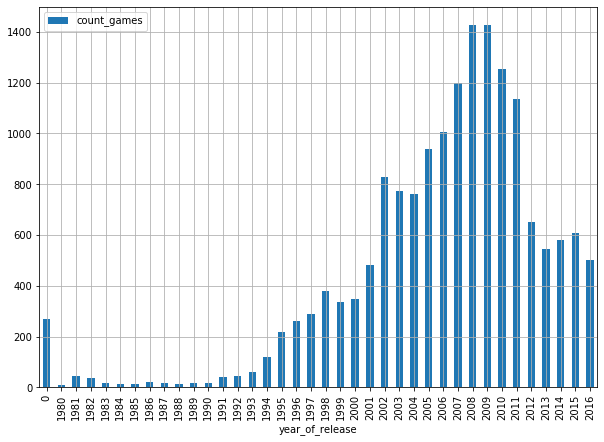

In [5]:
#узнаем сколько различных игр выпускалось в разные годы
count_games = df.groupby('year_of_release').agg({'name': 'count'}).reset_index().\
rename(columns={'name': 'count_games'})
print(count_games)
count_games.plot(x='year_of_release', kind = 'bar', grid=True, figsize=(10, 7))

Наиболее активным периодом, когда выспускались компьютерныеигры можно считать с 2001 года, когда начинается также компьютеризация населения. 

   platform  platform_sales
16      PS2         1255.77
28     X360          971.42
17      PS3          939.65
26      Wii          907.51
4        DS          806.12
15       PS          730.86
6       GBA          317.85
18      PS4          314.14
19      PSP          294.05
13       PC          259.52


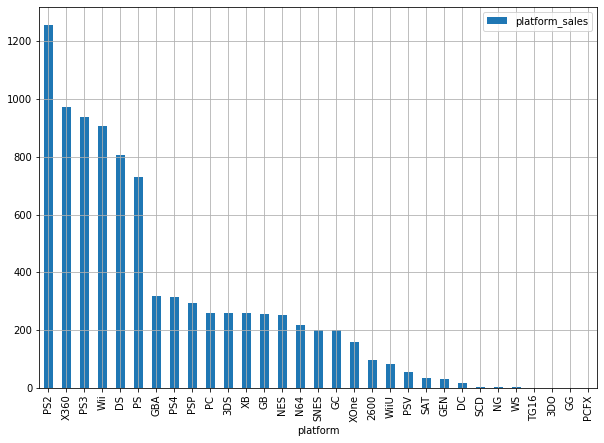

In [6]:
#как менялись продажи по платформам
platform_sales = df.groupby('platform').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'platform_sales'}).sort_values(by='platform_sales', ascending=False)
print(platform_sales.head(10))
platform_sales.plot(x='platform', kind = 'bar', grid=True, figsize=(10, 7))

Наиболее популярными платформами являются: PS2, X360, PS3, Wii, DS и PS

    year_of_release  sales_ps2  sales_x360  sales_ps3  sales_wii  sales_ds  \
0                 0      22.21       10.18       8.31      16.33      3.34   
18             1985        NaN         NaN        NaN        NaN      0.02   
19             1994        NaN         NaN        NaN        NaN       NaN   
20             1995        NaN         NaN        NaN        NaN       NaN   
21             1996        NaN         NaN        NaN        NaN       NaN   
22             1997        NaN         NaN        NaN        NaN       NaN   
23             1998        NaN         NaN        NaN        NaN       NaN   
24             1999        NaN         NaN        NaN        NaN       NaN   
1              2000      39.17         NaN        NaN        NaN       NaN   
2              2001     166.43         NaN        NaN        NaN       NaN   
3              2002     205.38         NaN        NaN        NaN       NaN   
4              2003     184.31         NaN        NaN        NaN

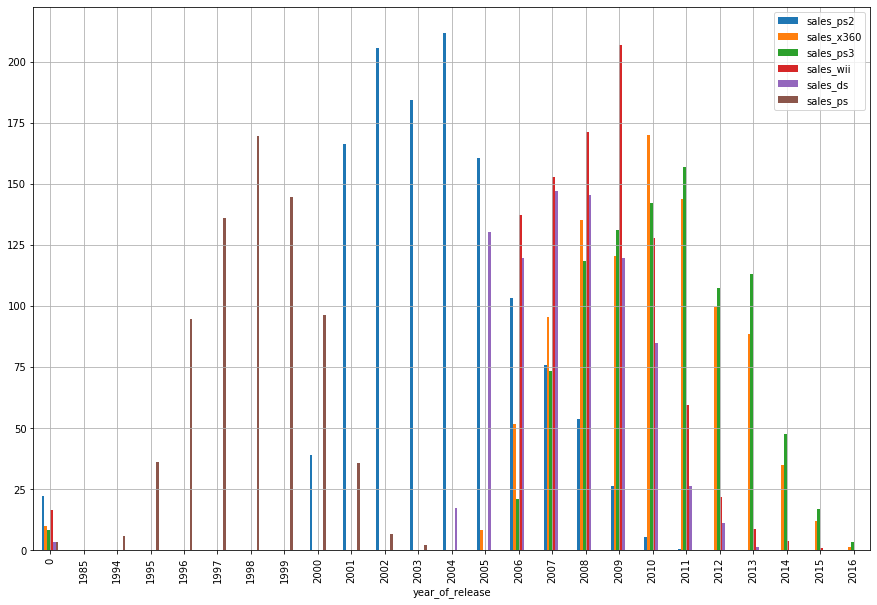

In [7]:
ps2 = df.query('platform == "PS2"')
ps2_sales = ps2.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_ps2'})

x360 = df.query('platform == "X360"')
x360_sales = x360.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_x360'})

ps3 = df.query('platform == "PS3"')
ps3_sales = ps3.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_ps3'})

wii = df.query('platform == "Wii"')
wii_sales = wii.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_wii'})

ds = df.query('platform == "DS"')
ds_sales = ds.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_ds'})

ps = df.query('platform == "PS"')
ps_sales = ps.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_ps'})


platform_sales = (ps2_sales
        .merge(x360_sales, on='year_of_release', how='outer')
        .merge(ps3_sales, on='year_of_release', how='outer')
        .merge(wii_sales, on='year_of_release', how='outer')
        .merge(ds_sales, on='year_of_release', how='outer')
        .merge(ps_sales, on='year_of_release', how='outer')
       ).sort_values('year_of_release')
print(platform_sales)

platform_sales.plot(x='year_of_release', y=['sales_ps2', 'sales_x360', 'sales_ps3', 'sales_wii', 'sales_ds', 'sales_ps'] , 
          kind = 'bar', grid=True, figsize=(15, 10)
         )

 

Первой самой популярной платформой была платформа PS, далее производиетль данной платформы выпустил обновление PS2, что за год привело к резкому росту продаж новой платформы и соответственно снижению продаж старой. За 3 годда продажи старой платформы полностью сошли на "нет". В начале 2004 года, появилась еще одна конкурентная платформа (DS), которая в 2005 году привела к снижению продаж PS2. Далее на рынок вышли такие платформы как X360 и Wii, а также новая версия PS - PS3. 2007 год был самым конкурентным среди платформ. Однако к 2014 году продажи всех платформ сильно упали. Скорее всего это связано с появлением и распространением игр на ПК и смартфонах. 

Наиболее актуальным периодом считаю данные с 2006 года, когда на рынок вышли все наиболее крупные игроки.
Лидерами продаж с 2006 года являются платформы Х360, Wii, PS3 и DS. С 2011 года наиболее прибыльными платформами стали Х360 и PS3, их продажи падали медленнее всего, однако с 2014 года все равно наблюдается резкое худшение ситуации.

platform                       3DS  DC    DS  GBA  GC  PC  PS2   PS3  PS4  \
name                                                                        
 Beyblade Burst               0.03 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Fire Emblem Fates            1.67 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Frozen: Olaf's Quest         0.59 NaN  0.51  NaN NaN NaN  NaN   NaN  NaN   
 Haikyu!! Cross Team Match!   0.04 NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
 Tales of Xillia 2             NaN NaN   NaN  NaN NaN NaN  NaN  0.84  NaN   
...                            ...  ..   ...  ...  ..  ..  ...   ...  ...   
thinkSMART FAMILY!             NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
thinkSMART: Chess for Kids     NaN NaN  0.01  NaN NaN NaN  NaN   NaN  NaN   
uDraw Studio                   NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
uDraw Studio: Instant Artist   NaN NaN   NaN  NaN NaN NaN  NaN   NaN  NaN   
¡Shin Chan Flipa en colores!   NaN NaN  0.14  NaN NaN NaN  NaN   NaN  NaN   

(0, 20)

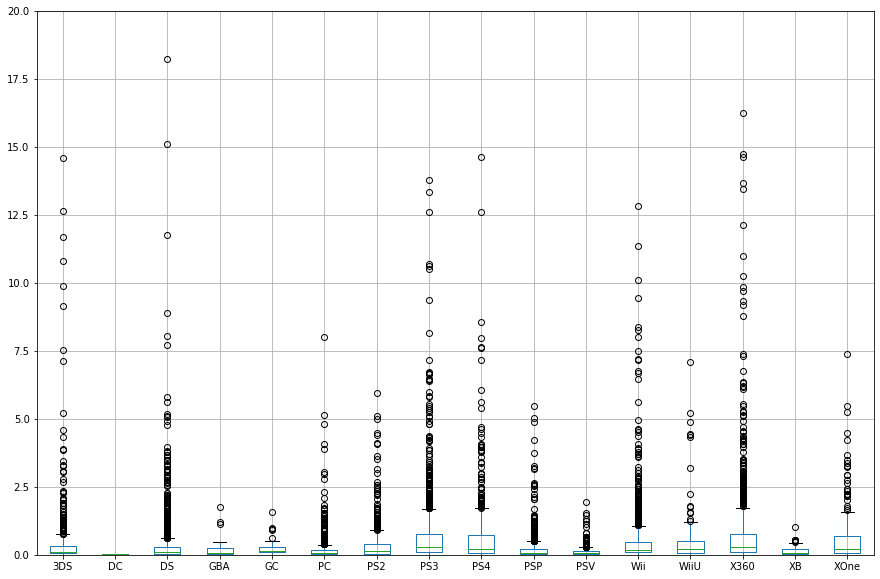

In [17]:
#определим актуальный DataFrame для дальнейшего анализа (берем данные с 2006 года)
actual_df = df.query('year_of_release > 2005')

#построим "ящик с усами" по всем играм с  разбивкой по платформам
sales_games = actual_df.pivot_table(index = ['name'], columns = 'platform', values = 'total_sales', aggfunc='sum')
print(sales_games)
sales_games.boxplot(figsize=(15, 10))
plt.ylim(0, 20)


Из графика видно, что бОльшие продажи приходится на платформы PS3, PS4, Wii, X360. При этом разницы в средних продажах по всем платформам не большая.

                              name platform  year_of_release    genre  \
16              Grand Theft Auto V      PS3             2013   Action   
34      Call of Duty: Black Ops II      PS3             2012  Shooter   
37  Call of Duty: Modern Warfare 3      PS3             2011  Shooter   
41         Call of Duty: Black Ops      PS3             2010  Shooter   
54                  Gran Turismo 5      PS3             2010   Racing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
34      4.99      5.73      0.65         2.42          83.0         5.3   
37      5.54      5.73      0.49         1.57          88.0         3.2   
41      5.99      4.37      0.48         1.79          88.0         6.4   
54      2.96      4.82      0.81         2.11          84.0         7.5   

   rating  total_sales  
16      M        21.05  
34      M        13.79  
37      M        13.33  
41      M 

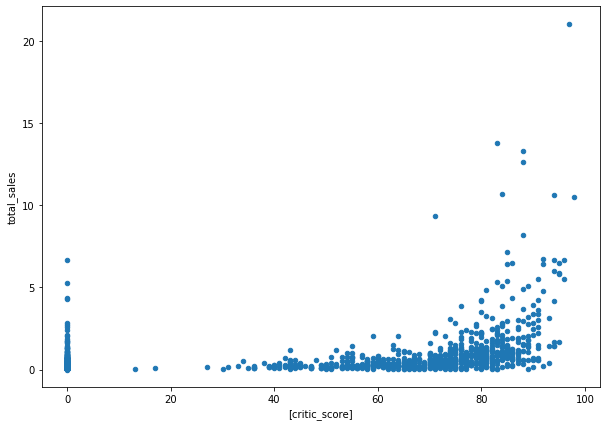

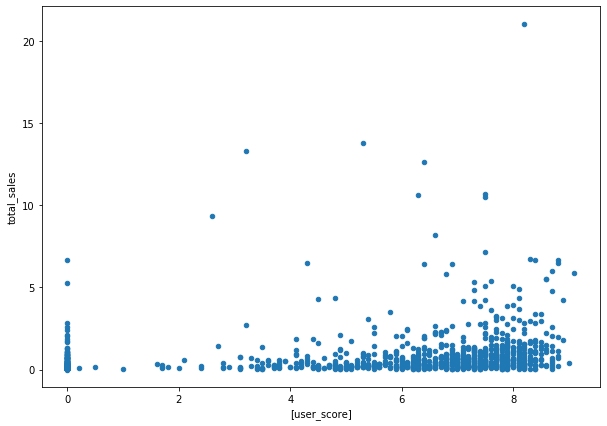

In [18]:
#влияние продажи внутри платформы PS3
ps3 = actual_df.query('platform == "PS3" and user_score != -100')
print(ps3.head(5))
print(ps3['total_sales'].corr(ps3['critic_score']))
print(ps3['total_sales'].corr(ps3['user_score']))
print()
print(actual_df['total_sales'].corr(actual_df['critic_score']))
print(actual_df['total_sales'].corr(actual_df['user_score']))
ps3.plot(x=['critic_score'], y='total_sales', kind='scatter', figsize=(10, 7))
ps3.plot(x=['user_score'], y='total_sales', kind='scatter', figsize=(10, 7))

Зависимость продаж от оценки критиков выше, чем от оценки пользователей. Скорее всего это связано с тем, что пользователь сначала изучает отзывы критиков, а затем принимает решение о покупке. Зависимость продаж прямая, чем выше оценка критика или пользователя, тем больше обьем продаж. Зависимость средняя. даже ближе к слабой, следовательно помимо оценок на продажи игр влияют и друие факторы. Указанная зависимость проявляется на всех платформах, но слабее. 

           genre  sales_on_genre
0         Action         1069.51
1      Adventure          116.16
2       Fighting          186.41
3           Misc          477.18
4       Platform          267.54
5         Puzzle           63.53
6         Racing          282.40
7   Role-Playing          519.22
8        Shooter          713.43
9     Simulation          166.64
10        Sports          737.03
11      Strategy           70.98


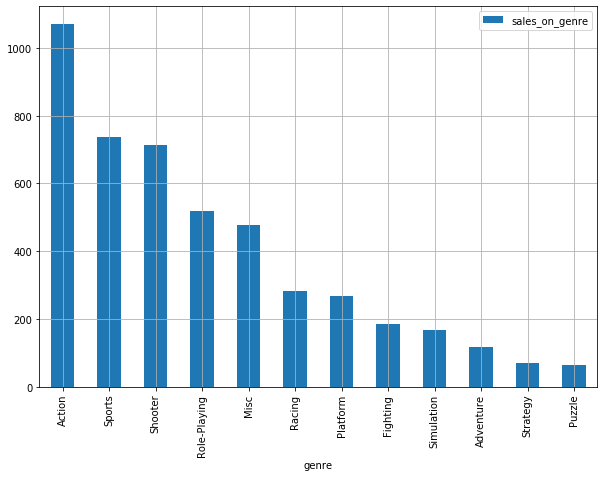

In [19]:
#распределение игр по жанрам 
genre_games = actual_df.query('user_score != -100')
genre_games = genre_games.groupby('genre').agg({'total_sales': 'sum'}).reset_index().\
rename(columns={'total_sales': 'sales_on_genre'})
print(genre_games)
genre_games.sort_values('sales_on_genre', ascending=False).plot(x='genre', kind='bar', grid=True, figsize=(10, 7))

Наиболее прибыльным жанром явяется action, а также хорошую прибыль приносят такие жанры как sports и shotter. Самые низкие продажи у жанров puzzle и strategy. Нужно проработать данные жанры, для принесения большей прибыли в компанию.

# 4. Портрет пользователей для каждого региона

   platform  total_sales
13     X360       952.99
7       PS3       931.34
11      Wii       891.18
2        DS       655.35
8       PS4       314.14
6       PS2       265.80
0       3DS       257.81
9       PSP       238.63
5        PC       163.42
15     XOne       159.32
12     WiiU        82.19
10      PSV        53.81
4        GC        11.53
14       XB        10.77
3       GBA         8.68
1        DC         0.06
  platform  eu_sales  %sales_eu  na_sales  %sales_na  jp_sales  %sales_jp  \
0      PS3    327.21  35.133249    390.13  41.889106     79.41   8.526424   
1     X360    267.89  28.110473    588.84  61.788686       NaN        NaN   
2      Wii    258.32  28.986288    486.87  54.632061     68.28   7.661752   
3       DS    142.99  21.818875    323.99  49.437705    141.49  21.589990   
4      PS4    141.09  44.913096       NaN        NaN       NaN        NaN   
5      PS2       NaN        NaN    114.89  43.224229       NaN        NaN   
6      3DS       NaN        NaN     

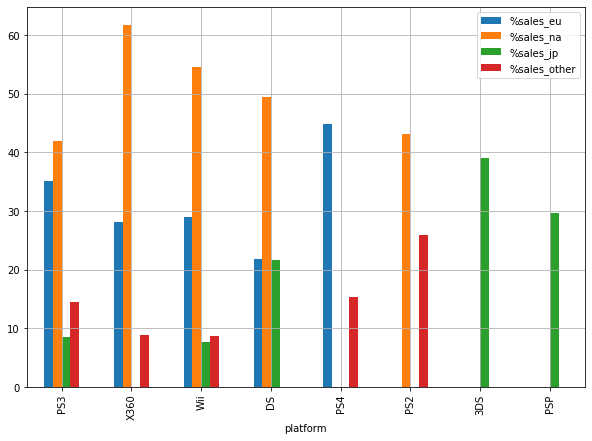

In [21]:
def top_5_platform(df, column):
    return (actual_df
              .groupby('platform')
              .agg({column: 'sum'})
              .reset_index()
              .sort_values(column, ascending=False).head(5)
            )

total_sales_platform = (actual_df
                        .groupby('platform')
                        .agg({'total_sales': 'sum'})
                        .reset_index()
                        .sort_values('total_sales', ascending=False)
                       )
print(total_sales_platform)

top_5_platform_eu = top_5_platform(actual_df, 'eu_sales')
top_5_platform_eu['%sales_eu'] = top_5_platform_eu['eu_sales'] / total_sales_platform['total_sales'] *100

top_5_platform_na = top_5_platform(actual_df, 'na_sales')
top_5_platform_na['%sales_na'] = top_5_platform_na['na_sales'] / total_sales_platform['total_sales'] *100

top_5_platform_jp = top_5_platform(actual_df, 'jp_sales')
top_5_platform_jp['%sales_jp'] = top_5_platform_jp['jp_sales'] / total_sales_platform['total_sales'] *100

top_5_platform_other = top_5_platform(actual_df, 'other_sales')
top_5_platform_other['%sales_other'] = top_5_platform_other['other_sales'] / total_sales_platform['total_sales'] *100

top_platform_sales = (top_5_platform_eu
        .merge(top_5_platform_na, on='platform', how='outer')
        .merge(top_5_platform_jp, on='platform', how='outer')
        .merge(top_5_platform_other, on='platform', how='outer')
       )
print(top_platform_sales)

top_platform_sales.plot(x='platform', y=['%sales_eu', '%sales_na', '%sales_jp', '%sales_other'], 
                        kind = 'bar', grid=True, figsize=(10, 7))

В Японии самыми популярными платформами являются 3DS и PSP, данные платформы распространены только на территории данной страны, в других странах популярностью они не пользуются. Платформа PS4 наиболее популярна в Европе. Лидером на игровом рынке по платформам стала Северная Америка. В этой стране самая большая доля продаж практически по всем популярным платформам(Х360, Wii, DS, PS2 и PS3). В других странах большей популярностью пользуется платформа PS2.

           genre  total_sales
0         Action      1116.65
10        Sports       793.85
8        Shooter       717.04
3           Misc       554.86
7   Role-Playing       522.40
6         Racing       299.00
4       Platform       279.74
9     Simulation       220.65
2       Fighting       188.42
1      Adventure       141.35
5         Puzzle        89.92
11      Strategy        73.14
          genre  eu_sales  %sales_eu  na_sales  %sales_na  jp_sales  \
0        Action    350.70  31.406439    530.44  47.502799    102.07   
1        Sports    251.55  31.687346    396.64  49.964099     48.97   
2       Shooter    238.89  33.316133    373.13  52.037543       NaN   
3          Misc    146.88  26.471542    285.06  51.375122     64.53   
4        Racing    113.39  37.923077       NaN        NaN       NaN   
5  Role-Playing       NaN        NaN    199.63  38.214012    170.38   
6      Platform       NaN        NaN       NaN        NaN     35.20   

   %sales_jp  other_sales  %sales_other  

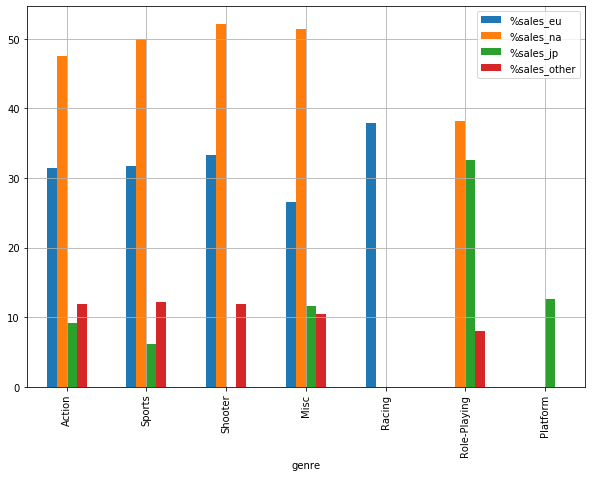

In [22]:
def top_5_genre(actual_df, column):
    return (actual_df
              .groupby('genre')
              .agg({column: 'sum'})
              .reset_index()
              .sort_values(column, ascending=False).head(5)
            )

total_sales_genre = (actual_df
                        .groupby('genre')
                        .agg({'total_sales': 'sum'})
                        .reset_index()
                        .sort_values('total_sales', ascending=False)
                       )
print(total_sales_genre)

top_5_genre_eu = top_5_genre(actual_df, 'eu_sales')
top_5_genre_eu['%sales_eu'] = top_5_genre_eu['eu_sales'] / total_sales_genre['total_sales'] *100

top_5_genre_na = top_5_genre(actual_df, 'na_sales')
top_5_genre_na['%sales_na'] = top_5_genre_na['na_sales'] / total_sales_genre['total_sales'] *100

top_5_genre_jp = top_5_genre(actual_df, 'jp_sales')
top_5_genre_jp['%sales_jp'] = top_5_genre_jp['jp_sales'] / total_sales_genre['total_sales'] *100

top_5_genre_other = top_5_genre(actual_df, 'other_sales')
top_5_genre_other['%sales_other'] = top_5_genre_other['other_sales'] / total_sales_genre['total_sales'] *100

top_genre_sales = (top_5_genre_eu
        .merge(top_5_genre_na, on='genre', how='outer')
        .merge(top_5_genre_jp, on='genre', how='outer')
        .merge(top_5_genre_other, on='genre', how='outer')
       )
print(top_genre_sales)

top_genre_sales.plot(x='genre', y=['%sales_eu', '%sales_na', '%sales_jp', '%sales_other'], 
                        kind = 'bar', grid=True, figsize=(10, 7))

Что касается самых популярных жанров. Жанр racing популярен только в Европе. В то же время, там абсолютно не популярны жанры racing и platform. Жанр platform популярен только в Японии. Также в Японии очень высоким спросом пользуется жанр role-playing, чего нельзя сказать о Европе. Удовлетворяющие вкус всех стран, стали жанры action, sports и misc. 

  rating  eu_sales  na_sales  jp_sales  other_sales
0      E    461.09    796.98    120.36       162.54
1      M    398.90    574.33     43.79       140.70
2      T    235.44    424.14     83.90       105.85
3   E10+    173.35    315.40     36.57        67.51
4     RP      0.03       NaN       NaN          NaN
5     EC       NaN      1.32      0.00         0.08


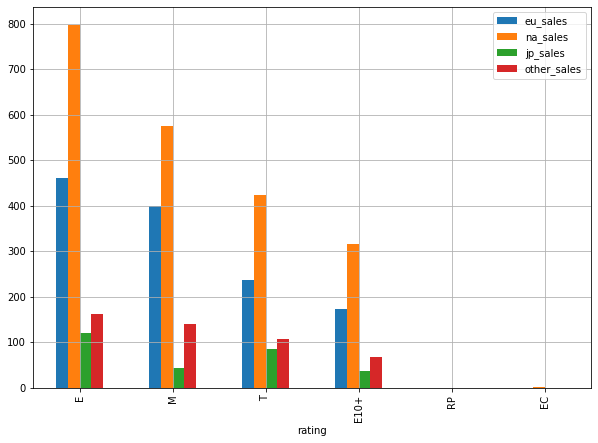

In [23]:
#влияение рейтинга ESRB на продажи в разных регионах
def group_rating(actual_df, column):
    return (actual_df
              .groupby('rating')
              .agg({column: 'sum'})
              .reset_index()
              .sort_values(column, ascending=False).head(5)
            )

rating_eu = group_rating(actual_df, 'eu_sales')
rating_na = group_rating(actual_df, 'na_sales')
rating_jp = group_rating(actual_df, 'jp_sales')
rating_other = group_rating(actual_df, 'other_sales')

rating_sales = (rating_eu
        .merge(rating_na, on='rating', how='outer')
        .merge(rating_jp, on='rating', how='outer')
        .merge(rating_other, on='rating', how='outer')
       )
print(rating_sales)

rating_sales.plot(x='rating', y=['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], 
                  kind = 'bar', grid=True, figsize=(10, 7))

Во всех странах наиболее высокие продажи у игр рейтинга "E", это игры "для всех", и для детей от 6 лет и для взрослых. На втором месте по продажам в Северной Америке и Европе рейтинг "М", "для взрослых", от 17 лет. В Японии на втором месте по продажам рейтинг "Т", "для подростков", от 13 лет. Самые не популярный рейтинг "ЕС", "для детей младшего возраста" от 3 лет. "RP" означает что рейтинг еще не присвоен. 

# 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [24]:

mean_rating_XOne = actual_df.query('platform == "XOne" and user_score != -100')
mean_rating_PC = actual_df.query('platform == "PC" and user_score != -100')

variance_rating_XOne = np.var(mean_rating_XOne['user_score'])
variance_rating_PC = np.var(mean_rating_PC['user_score'])
print('Дисперсия пользовательких рейтингов Xbox One', variance_rating_XOne, 'и дисперсия РС', variance_rating_PC)

alpha = 0.05     

results = st.ttest_ind(mean_rating_XOne['user_score'], mean_rating_PC['user_score'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательких рейтингов Xbox One 8.967153655558747 и дисперсия РС 8.138592700319009
p-значение:  0.0008444127391360951
Отвергаем нулевую гипотезу


Н0: средние рейтинги пользователей платформ Xbox One и PC равны. Гипотезу отвергаем. Дисперсии данных совокупностей практически не различаются, поэтому значение equal_var выбрано True, которрое идет по умолчанию. То есть срейдние рейтинги пользователей Xbox One и РС различаются.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [25]:
mean_rating_action = actual_df.query('genre == "Action" and user_score != -100')
mean_rating_sports = actual_df.query('genre == "Sports" and user_score != -100')

variance_rating_action = np.var(mean_rating_action['user_score'])
variance_rating_sports = np.var(mean_rating_sports['user_score'])
print('Дисперсия пользовательких рейтингов жанра Action', variance_rating_action, 'и дисперсия жанра Sports', variance_rating_sports)

alpha = 0.05     

results = st.ttest_ind(mean_rating_action['user_score'], mean_rating_sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательких рейтингов жанра Action 12.249749761699038 и дисперсия жанра Sports 10.853644655666676
p-значение:  0.7455780326156889
Не получилось отвергнуть нулевую гипотезу


Н0: средние рейтинги пользователей жанров Action и Sports равны. Дисперсии данных совокупностей имеют небольшое различие, поэтому значение equal_var выбрано False. Гипотезу отвергнуть не можем, имеется 75% вероятности того, что данные могут быть случайно равны. Это высокая вероятность, поэтому утверждать что средние рейтинги пользователей жанров Action и Sports равны не можем.

# 6. Общий вывод

При построении рекламной компании или разработки нового продукта, необходимо учитывать следующее:

1. С 2014 года продажи компьютерных игр сильно упали, скорее всего данный факт связан с тем, что большинство людей для игр стали ипользовать ПК и смартфоны.

2. Наиболее популярными платформами в Европе, которые используются для игр остаются: X360, DS, PS2, PS3 и Wii.
   Для Северной Америки: PS3, PS4, Х360 и Wii.
   Для Японии: 3DS, PSP и PS.
   Для остальных стран: PS2, PS3, PS4.
   
3. Наиболее прибыльными жанрами для Европы явяются action, sports, shooter, misc, role-playing.
   Для Северной Америки: racing, action, sports, shooter, misc.
   Для Японии: action, sports, misc, role-playing, platform
   Для остальных стран: action, sports, shooter, misc, role-playing
   Самые низкие продажи у жанров puzzle и strategy. Рекламную кампанию данных жанров нужно прорабатывать более тщательно. 

4. Что касается возрастной категории, то популярностью пользуются все игры от 6 лет. Игры для детей младшего возраста (от 3 лет) требуют особого подхода при продвижении.

5. Также на продажи игр небольшое влияние оказывают оценки критиков, чем выше оценка критиков, тем выше обьем продаж.
